# Advanced Numerical Methods in python

In this tutorial, python is used to solve numerical methods problems.

list of MATLAB algorithms:

|code1|
|:---:|
|bisect.m|
|bisect2.m|
|false_position.m|
|multiple1.m|
|multiple2.m|
|newtraph.m|

|code2|
|:---:|
|Cubic_LS.m|
|Gauss_Newton.m|
|Lagrange_coef.m|
|Lagrange_Eval.m|
|Linear_LS.m|
|linregr.m|
|Multiple_Linear.m|
|Newtint2.m|
|quadratic.m|
|Quadratic_LS.m|

|code3|
|:---:|
|Cholesky.m|
|GaussNaive.m|
|GaussPivot.m|
|LU_factor.m|
|LU_pivot.m|
|LU_Solve.m|
|Tridiag.m|
|Truss.m|

|code4|
|:---:|
|fixed_pt_sys.m|
|GaussSeidel.m|
|InvPower.m|
|LU_Solve_Gen.m|
|Newton_sys.m|
|Power_eig.m|
|SOR.m|

|code5|
|:---:|
|Gauss_quad.m|
|quadadapt.m|
|romberg.m|
|Simp.m|
|trap1.m|
|trapuneq.m|

|code6|
|:---:|
|Euler_sys.m|
|eulode.m|
|example2_e.m|
|example2_f.m|
|example3.m|
|example5.m|
|Heun_iter.m|
|Midpoint.m|
|RK4.m|
|RK4_sys.m|

|code6|
|:---:|
|example1_f.m|
|example2_f.m|
|linear_FD.m|
|shoot_secant.m|

Textbooks:
Python Programming And Numerical Methods: A Guide For Engineers And Scientists
[**ebook**](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html)
[**pdf**](https://library.samdu.uz/files/8ea2cbd32e87c6d25a17c4b2510501d0_Python_Programming_and_Numerical_Methods_A_Guide_for_Engineers_and.pdf)

In [2]:
# Import essential libraries
import numpy as np
import anm

---
# Lecture 3 Roots Finding
## 1. Bisection Method

In [9]:
def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

In [3]:
# Example of Bisection Method
f = lambda x: x*(np.e**(-x/2)) - 0.5
anm.bisect(f, 0, 1, 1e-5)

(0.7148059123627784, 2.220446049250313e-16, 1.2425448703470668e-13, 50)

In [4]:
# Matlab Example: Bisection
f2 = lambda m: np.sqrt(9.81*m/0.25)*np.tanh(np.sqrt(9.81*0.25/m)*4)-36
my_bisection(f2, 40, 200, 1e-4)

NameError: name 'my_bisection' is not defined

## 2. False-Position Method

In [5]:
anm.false_position(f)

enter lower bound xl = 0
enter upper bound xu = 1
allowable tolerance es = 0.001
maximum number of iteration maxit = 100
False position method has converged
	step	xl	xu	xr	f(xr)
	1	0.0	1.0	0.8243606353500641	0.04589561751025395
	2	0.0	0.8243606353500641	0.7550533553555956	0.0176305368332188
	3	0.0	0.7550533553555956	0.7293361786332118	0.006470807748721441
	4	0.0	0.7293361786332118	0.7200179827492268	0.0023349842072255544
	5	0.0	0.7200179827492268	0.7166711511099948	0.0008374083806060861
	6	0.0	0.7166711511099948	0.715472865163227	0.0002996612476933169
	7	0.0	0.715472865163227	0.7150443230152455	0.00010714701583858233


([0.8243606353500641,
  0.7550533553555956,
  0.7293361786332118,
  0.7200179827492268,
  0.7166711511099948,
  0.715472865163227,
  0.7150443230152455],
 [0.04589561751025395,
  0.0176305368332188,
  0.006470807748721441,
  0.0023349842072255544,
  0.0008374083806060861,
  0.0002996612476933169,
  0.00010714701583858233])

## 4. Newton-Raphson Method

In [12]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

In [8]:
df =  lambda m: 0.5*np.sqrt(9.81/(m*0.25))*\
                np.tanh(np.sqrt(9.81*0.25/m)*4)-9.81/(2*m)*4*\
                np.cosh(np.sqrt(9.81*0.25/m)*4)**-2
my_newton(f2, df, 140, 1e-5)

NameError: name 'my_newton' is not defined

In [9]:
anm.newtraph(f2, df, 140)

(142.73763310844893, 2.3894225071373976e-13, 50)

## 5.2 Modified Newton's Method

In [13]:
anm.multiple(f2, df)

enter multiplicity of the root = 0.1
enter initial guess: xguess = 140
allowable tolerance es = 0.001
maximum number of iterations: maxit = 100
Newton method has converged
	step	x	f	df/dx
	1	140.0	-0.05698528372746381	0.021181693040110694
	2	140.26903082590968	-0.05698528372746381	0.021181693040110694
	3	140.53806165181936	-0.05129658930001568	0.021108649673659413
	4	140.78107382973252	-0.045627494986568706	0.02103598354880283
	5	140.99797595309042	-0.04052343730668184	0.02097066726933884
	6	141.191214617298	-0.0359811541088888	0.02091262543268728
	7	141.36326931327437	-0.03194500593200189	0.020861118574582144
	8	141.51640111115853	-0.028359686155503994	0.020815418204213787
	9	141.65264476419148	-0.02517528984584061	0.020774870257143932
	10	141.77382621819928	-0.022347297483250372	0.020738893676393838
	11	141.88158171293276	-0.019836063040330032	0.02070697291112983
	12	141.9773758356443	-0.017606299394977043	0.020678650589591535
	13	142.06251823562198	-0.015626610204719782	0.0206535209

([140.0,
  140.26903082590968,
  140.53806165181936,
  140.78107382973252,
  140.99797595309042,
  141.191214617298,
  141.36326931327437,
  141.51640111115853,
  141.65264476419148,
  141.77382621819928,
  141.88158171293276,
  141.9773758356443,
  142.06251823562198,
  142.13817899216903,
  142.20540267855344,
  142.26512118280385,
  142.31816535638802,
  142.36527556744417,
  142.40711123762242,
  142.4442594415882,
  142.4772426464969,
  142.5065256657925,
  142.5325218979141,
  142.55559891622573,
  142.57608347195313,
  142.59426596729278,
  142.61040445128094,
  142.62472818656644,
  142.63744083098246,
  142.64872327379837,
  142.65873616277852,
  142.6676221546887,
  142.67550791867595,
  142.6825059189981,
  142.6887160008848,
  142.6942268008611,
  142.6991170006409,
  142.70345644168762,
  142.7073071157243,
  142.7107240448434,
  142.7137560633966,
  142.71644651252865,
  142.7188338570382,
  142.72095223319195,
  142.72283193517262,
  142.7244998469975,
  142.725979825991

## 5.3 Modified Newton's Method with u = f/f'

In [15]:
anm.multiple2(f2, df, ddf)

NameError: name 'ddf' is not defined

## 7. Secant Method

## 8. MATLAB function: fzero

## 9.1 Muller's Method

## 9.3 MATLAB function: roots

## fsolve function

In [11]:
from scipy.optimize import fsolve

In [13]:
f = lambda x: x**6 -6*x**5 +14*x**4 +10*x**3 -111*x**2 +56*x +156
fsolve(f, [-3, 3])

array([-2.,  3.])

In [16]:
f = lambda x: x**5 -11*x**4 +46*x**3 -90*x**2 +81*x -27
fsolve(f, [-1, 4])

array([0.99999999, 3.00004243])

---
# Lecture 4: Interpolation and Polynomial Approximation
## 1.1 Linear Least Square

[[0.83928571]
 [0.07142857]]


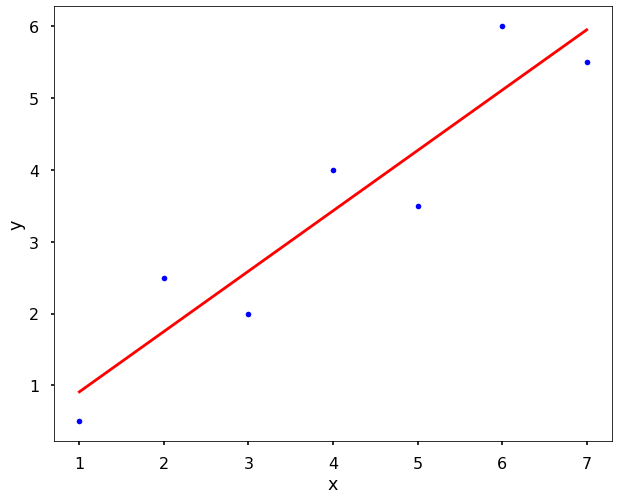

In [69]:
x = np.arange(1,8)
y = np.array([0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5])

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 1.1.3 Least Square Regression for Nonlinear Functions
### Exponential equation

alpha=0.1365056048572495, beta=0.26611715342485803


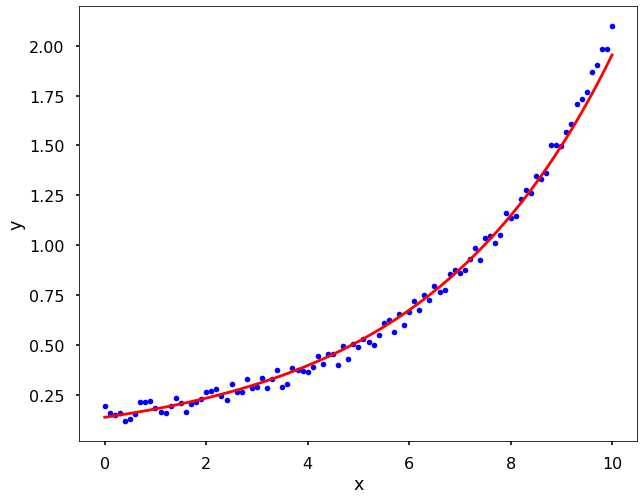

In [22]:
# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Power equation (need to change)

alpha=0.1353212723076572, beta=0.2660475406068311


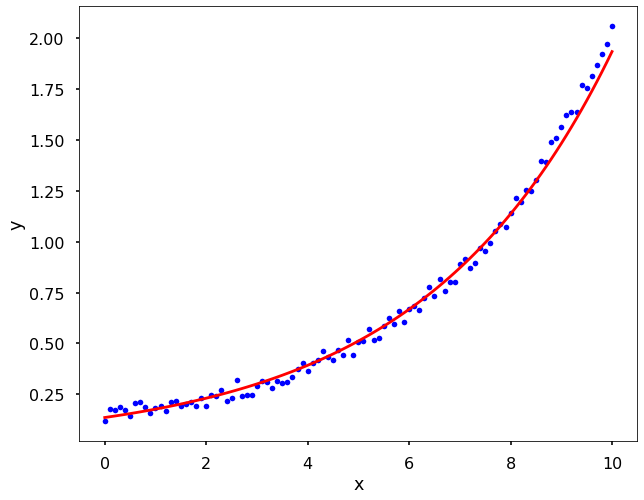

In [23]:
# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## optimize.curve_fit

In [26]:
from scipy.optimize import curve_fit

alpha=0.12295995684145532, beta=0.28034391106714474


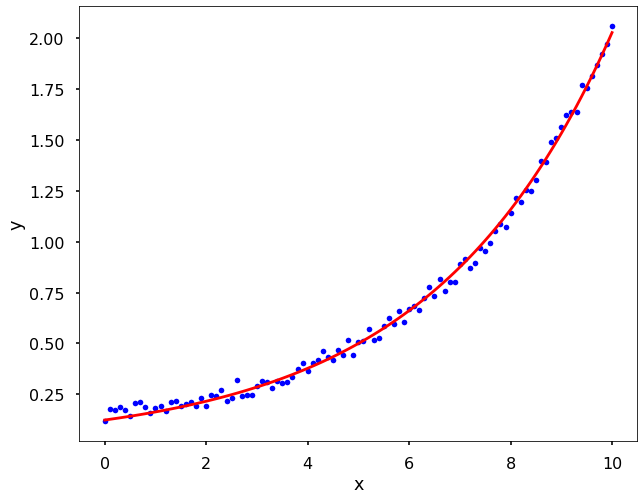

In [27]:
# let's define the function form
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 1.2 Polynomial Regression

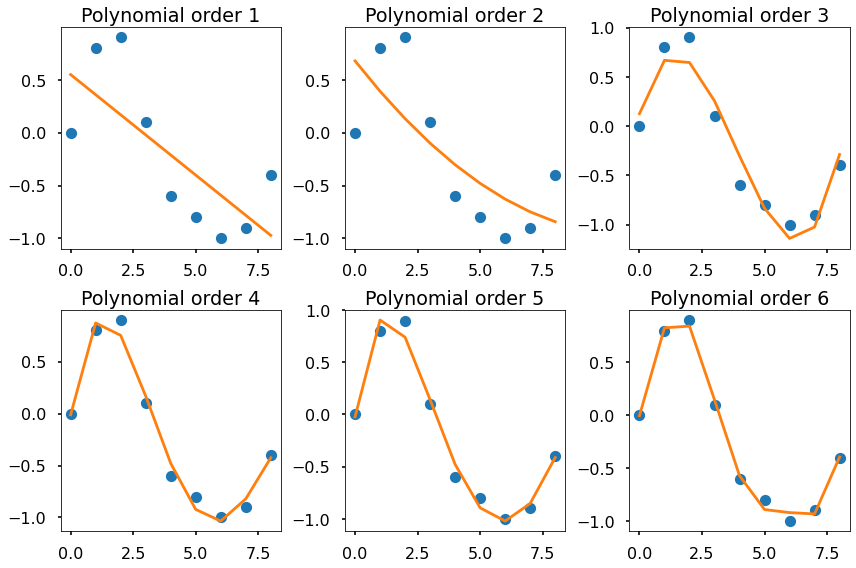

In [24]:
# numpy.polyfit and numpy.polyval are used

x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):
    
    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

## 1.3 Multi-variable Linear Regression

## 1.4 Nonlinear Regression
### 1.4.1 Gauss-Newton Method

## 2. Polynomial Interpolation
### ill-conditioned matrix

In [55]:
A = [[250**3, 250**2, 250, 1],
     [300**3, 300**2, 300, 1],
     [400**3, 400**2, 400, 1],
     [500**3, 500**2, 500, 1]]

b = [0.675, 0.616, 0.525, 0.457]

In [56]:
# matrix left division
np.linalg.lstsq(A, b, rcond=None)[0]

array([-2.600e-09,  4.270e-06, -2.937e-03,  1.183e+00])

## 2.1 Newton Polynomials
### 2.1.1 Newton Linear Interpolation

In [60]:
from scipy.interpolate import interp1d

39.14200114698843


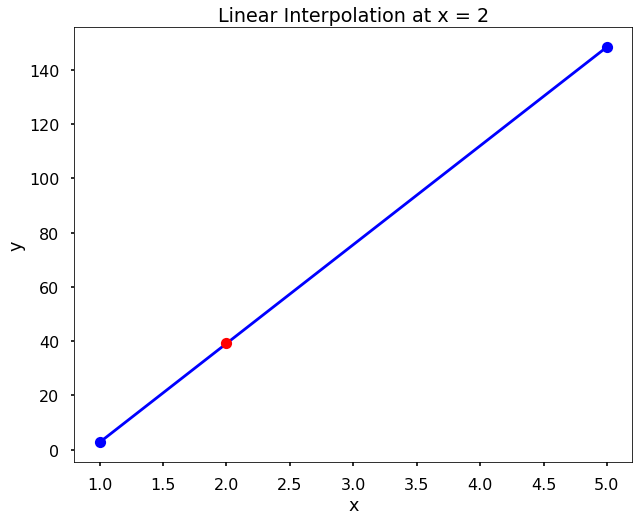

In [63]:
# Example 1:

x = [1, 5]
y = [np.e**1, np.e**5]
xr = 2

f = interp1d(x, y)
y_hat = f(xr)
print(y_hat)

plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(xr, y_hat, 'ro')
plt.title('Linear Interpolation at x = ' + str(xr))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

8.332091515520768


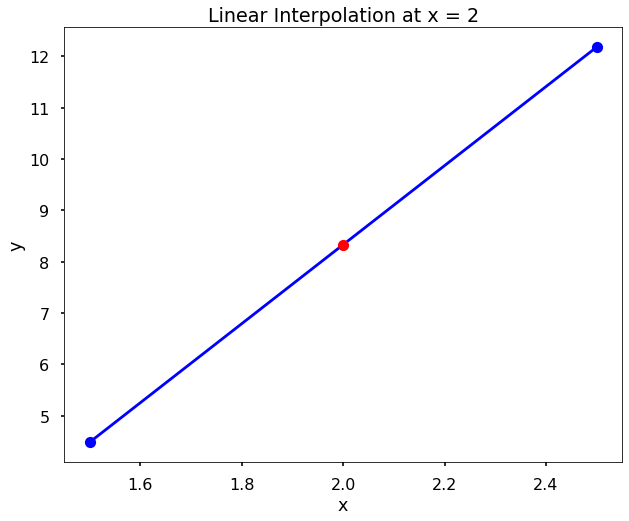

In [64]:
# Example 2:

x = [2.5, 1.5]
y = [np.e**2.5, np.e**1.5]
xr = 2

f = interp1d(x, y)
y_hat = f(xr)
print(y_hat)

plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(xr, y_hat, 'ro')
plt.title('Linear Interpolation at x = ' + str(xr))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [66]:
print("True value: {}".format(np.e**2))

True value: 7.3890560989306495


### 2.1.2 Newton Quadratic Interpolation

### 2.1.3 Newton's Interpolating Polynomials

### 2.1.4 Newton's Divided Differences

In [67]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

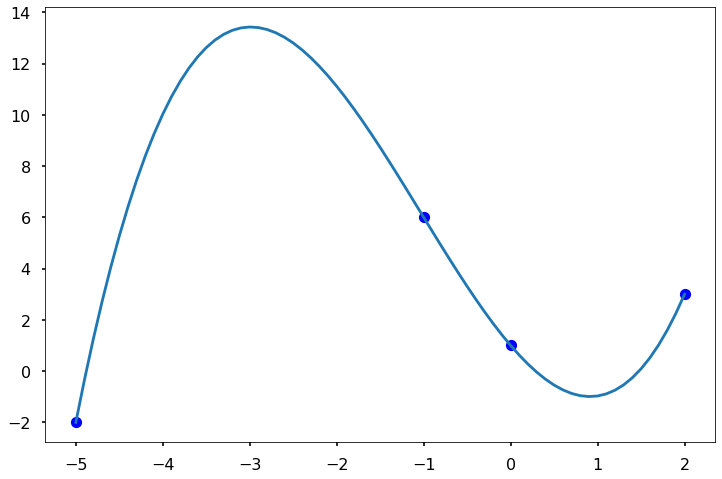

In [68]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

## 2.2 Lagrange Interpolating Polynomials
### 2.2.1 Linear Lagrange Interpolation

### 2.2.2 Quadratic Lagrange Interpolation

### 2.2.4 Error Bound of Polynomial Interpolation

## 2.3 Spline Interpolation
### 2.3.1 Linear Splines

### 2.3.2 Quadratic Splines

### 2.3.3 Cubic Splines

---
# Lecture 5: Linear System
### 1.2.1 Scalars, Vectors, Matrices

In [1]:
# numpy scaler, vector, and matrices

### 1.2.2 Square Matrix

In [2]:
# numpy square matrix

### 1.2.3 Special Matrices

In [ ]:
# symmetric matrics

# transpose

# trace (sum of diagonal values)

# Diagonal matrix

# Identity matrix

# Banded matrix

# lower triangular

# Upper triangular


## 1.3 Matrix Operation Rules

In [3]:
# Matrix identity


### 1.3.1 Addition and Subtraction

In [4]:
# commutative

# associative


### 1.3.2 Multiplication of Matrix by a Scalar

### 1.3.3 Matrix Multiplications

In [ ]:
# dimentional rule in multiplication

# associative

# distributive

# not generally commutative


### 1.3.4 Matrix Inverse

In [6]:
# A * A-1 = I


### 1.3.5 Matrix Augmentation

In [7]:
# [A | b]


### Truss

In [ ]:
# develop Truss() in python

## 2. Gauss Elimination
### 2.1.1 Cramer's Rule

In [8]:
# find x(i), x(i) = D(i)/D


### 2.1.2 Elimination Method

In [10]:
# Ax = b
# x = inv(A)*b


## 2.2 Gauss Elimination

In [12]:
# develop GaussNavie() in python

### 2.3.1 Determinant

In [ ]:
# calaculate determinant using Gauss elimination

### 2.3.2 Gauss Elimination with Partial Pivoting

In [ ]:
# develop GaussPivot() in python

In [13]:
# Example: TRUSS

### 2.4.2 Tridiagonal Matrix

In [14]:
# develop Tridiag() in python

## 3. LU Decomposition Methods
### 3.4.5 Forward and Back Substitutions

In [15]:
# develop LU_Solve() in python

#### without pivoting

In [17]:
# develop LU_factor() in python

#### with pivoting

In [ ]:
# develop LU_pivot() in python

In [19]:
# Permutation Matrix

## 3.6 Mathlab methods

In [22]:
# chol
# lu

## 3.7 Cholesky LU Factorization

In [20]:
# develop Cholesky() in python

---
# Lecture 6: Iterative Methods, Nonlinear Systems and Eigenvalue problems

## 1.1 Matrix Inverse using LU decomposition

In [1]:
# [A] = [L][U]
# [L][Y] = [I]
# [U][X] = [Y]

# develop LU_Solve_Gen() in python

### 1.2.3 Matrix Condition

In [2]:
# norm()
# cond()

### 2.4 Power Method

In [3]:
# develop power_eig() in python

In [5]:
# eig()

In [6]:
# develop InvPower() in python

### 3.2 Jacobi Method

In [ ]:
# I suspect this is a built in function.
# develop Jacobi() in python

### 3.3 Gauss-Seidel Method

In [8]:
# develop GaussSeidel() in python

### 3.4 Successive Over Relaxation (SOR)

In [9]:
# develop SOR() in python

### 4.1 Newton-Raphson Method

In [11]:
# develop Newton_sys() in python

### 4.2 Fixed Point Method

In [ ]:
# develop fixed_pt_sys() in python

---
# Lecture 7: Numerical Integration and Differentiation
## 1.1 Numerical Integration
### 1.1.1 Newton-Cotes Open Formula
### 1.1.2 Composite Trapezoidal Rule

In [1]:
# develop Trap() in python

In [ ]:
# MATLAB function Quad()

### 1.1.3 Simpson's 1/3 Rule

In [ ]:
# develop Simp() in python

### 1.1.4 Simpson's 3/8 Rule

### 1.1.5 Composite Trapezoidal Rule with unequal Segments

In [ ]:
# develop trapuneq() in python

In [ ]:
# MATLAB function trapz(), cumtrapz()

### 1.1.7 Netwon-Cotes Open Integration Formula

## 1.2 Double Integral

In [2]:
# MATLAB function dblquad(), triplequad()

### 1.2.1 Richardson Extrapolation
### 1.2.1.2 Romberg Integration

In [3]:
# develop romberg() in python

### 1.2.2 Gauss Quadrature

In [5]:
# develop Gauss_quad() in python

### 1.2.3 Adaptive Quadrature

In [6]:
# develop quadadapt() in python

In [7]:
# MATLAB function trapz(), quad(), quadl()

## 2. Numerical Differentiation
## 2.1 First Derivatives

In [9]:
# Forward Difference

# Backward Difference

# Central Difference

## 2.2 Second Derivatives

In [10]:
# Centered Finite Difference

# Forward Finite Difference

# Backward Finite Difference

## 2.3 First Derivatives using Parabolic Curve

In [11]:
# 3-point Forward difference

# 3-point Backward difference

## 2.4 Higher Derivatives

In [13]:
# second order accuate O(h^2) on Central Finite Difference

## 2.5 Using Richardson Extrapolation for Central Difference Scheme

## 2.6 General Unevenly Three Point Formula
### 2.6.1 Lagrange Interpolation

In [14]:
# 1st-order Lagrange polynomial

# 2nd-order Lagrange polynomial

# 3rd-order Lagrange polynomial

### 2.6.2 General Three-point Formula

In [16]:
# Lagrange interpolation polynomial for unrqually spaced data

### 2.6.3 First and Second Derivative

In [17]:
# First Derivative for unequally spaced data

# Second Derivative for unequally spaced data

In [18]:
# MATLAB function polyfit(), polyder(), diff()

---
# Lecture 8: Ordinary Differentiation Equations